In [1]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
import pandas as pd

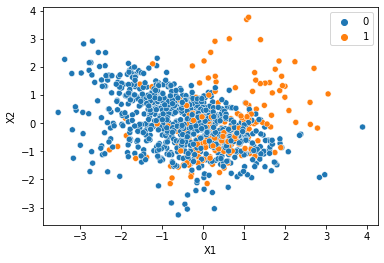

In [2]:
X, y = make_classification(n_samples=1000, n_features=2,n_redundant=0, weights=[0.8], random_state=1, class_sep=0.5)

X = pd.DataFrame(X, columns=['X1', 'X2'])
y = pd.Series(y)

import seaborn as sns
sns.scatterplot(data=X, x='X1', y='X2', hue=y);

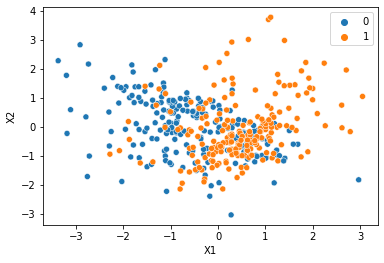

In [3]:
under_sampler = RandomUnderSampler(sampling_strategy='auto')
X_res, y_res = under_sampler.fit_resample(X, y)
X_res = pd.DataFrame(X_res, columns=['X1', 'X2'])
y_res = pd.Series(y_res)

import seaborn as sns
sns.scatterplot(data=X_res, x='X1', y='X2', hue=y_res);

In [4]:
y.value_counts()

0    793
1    207
dtype: int64

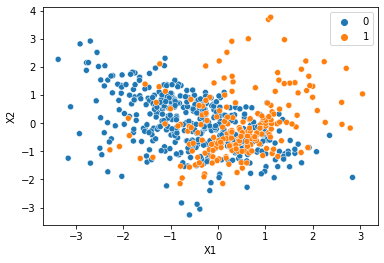

In [5]:
under_sampler = RandomUnderSampler(sampling_strategy=0.5)
X_res, y_res = under_sampler.fit_resample(X, y)
X_res = pd.DataFrame(X_res, columns=['X1', 'X2'])
y_res = pd.Series(y_res)

import seaborn as sns
sns.scatterplot(data=X_res, x='X1', y='X2', hue=y_res);

In [6]:
y_res.value_counts()

0    414
1    207
dtype: int64

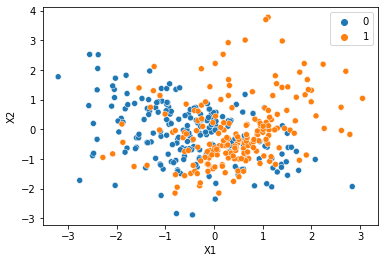

In [13]:
under_sampler = RandomUnderSampler(sampling_strategy={0:200, 1:200})
X_res, y_res = under_sampler.fit_resample(X, y)


import seaborn as sns
sns.scatterplot(data=X_res, x='X1', y='X2', hue=y_res);

In [12]:
y_res.value_counts()

0    200
1    200
dtype: int64

### Tomek Links

In [16]:
def make_data(sep):
    X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                               weights=[0.9], class_sep=sep, random_state=1)
    
    X = pd.DataFrame(X, columns =['X1', 'X2'])
    y = pd.Series(y)
    
    return X, y

In [20]:
X, y = make_data(sep=1)

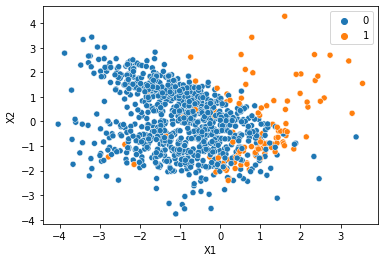

In [21]:
sns.scatterplot(data=X, x='X1', y='X2', hue=y);

In [22]:
y.value_counts()

0    893
1    107
dtype: int64

In [23]:
from imblearn.under_sampling import TomekLinks

In [24]:
tl = TomekLinks(sampling_strategy='auto')

In [25]:
X_res, y_res = tl.fit_resample(X, y)

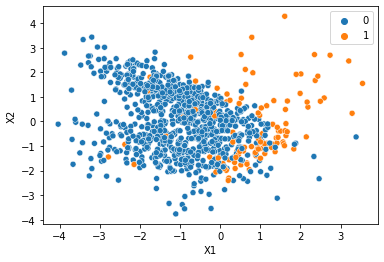

In [26]:
sns.scatterplot(data=X_res, x='X1', y='X2', hue=y_res);

### Edited Nearest Neighbor (ENN)

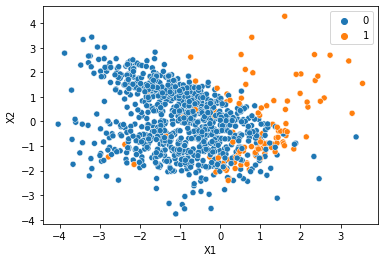

In [27]:
sns.scatterplot(data=X, x='X1', y='X2', hue=y);

In [28]:
from imblearn.under_sampling import EditedNearestNeighbours

In [40]:
enn = EditedNearestNeighbours(sampling_strategy='auto',
                             n_neighbors=3,
                             kind_sel='all')

In [41]:
X_res, y_res = enn.fit_resample(X, y)

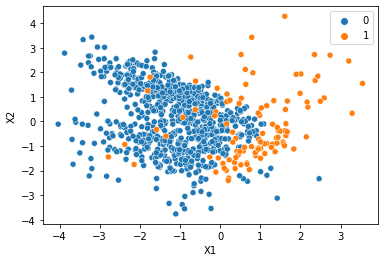

In [42]:
sns.scatterplot(data=X_res, x='X1', y='X2', hue=y_res);

In [43]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

In [49]:
renn = RepeatedEditedNearestNeighbours(sampling_strategy='auto',
                                      n_neighbors=3,
                                      kind_sel='all',
                                      max_iter=100)

In [50]:
X_res, y_res = renn.fit_resample(X, y)

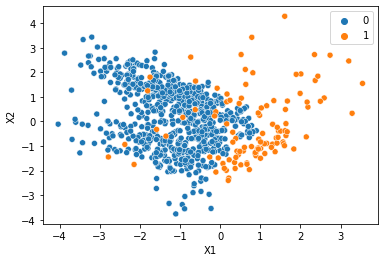

In [51]:
sns.scatterplot(data=X_res, x='X1', y='X2', hue=y_res);